# Module 3A: Statistical properties of time series data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from utils_statsmodels import bglm_test, dynamic_pred

A note of caution:

The first fitted values of an ARIMA models depend on lagged variables of the residuals and/or the dependent variable that do not yet exist. EViews ans `statsmodels` estimate these values, but they use different techniques for doing so. This difference leads to different series for the residuals, affecting the values of the autocorrelation function and the values of the Q-statistic. Therefore, it is impossible to recover the exact same values.

## Question 3.8

In [2]:
# Load data
idarma = pd.read_csv("data/module3_data_Identifying_ARMA.csv")

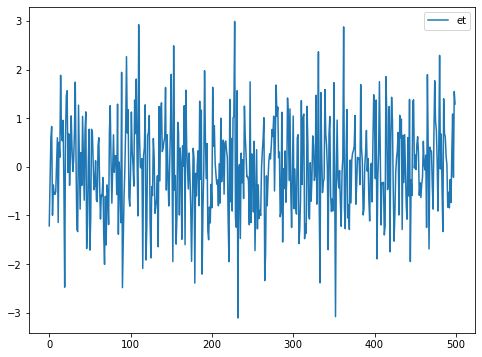

In [3]:
# Always plot the data!
idarma.plot(figsize=(8, 6));

In [4]:
print(f'mean: {np.mean(idarma["et"]):.3f}')
print(f'std: {np.std(idarma["et"]):.3f}')

mean: -0.028
std: 0.981


## Question 3.9

Using et as the white noise disturbance, and assuming the initial value of y to be equal to zero generate a new random variable yar, which follows the following AR(1) process:

$y_{t} = 3.0 + 0.55 y_{t-1} + \epsilon_t$

Enter the value of the 5th observation of variable yar (to three decimal places, without any rounding):

In [5]:
et = idarma.et.values
ar1 = np.zeros(len(et))
for i in range(len(ar1) - 1):
    ar1[i+1] = 3 + 0.55 * ar1[i] + et[i+1]

pd.Series(ar1)[4]



5.647962734609875

## Question 3.10

Also using et as the white noise disturbance and again assuming that the initial value of y is equal to zero, generate the variable yma which follows the following MA(1) process:

$y_{t} = -2.5 + \epsilon_t + 0.7 \epsilon_{t-1}$

In [6]:
ma1 = np.zeros(len(et))
for i in range(len(ma1) - 1):
    ma1[i+1] = -2.5 + et[i+1] + 0.7 * et[i]

pd.Series(ma1)[4]

-2.9154436509

## Question 3.11
Based on the patterns of ACF and PACF observed in the past lecture for an AR(1) process, which of the following statements is true?

/home/joao/moocs/time-series/envs/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'PACF - MA1')

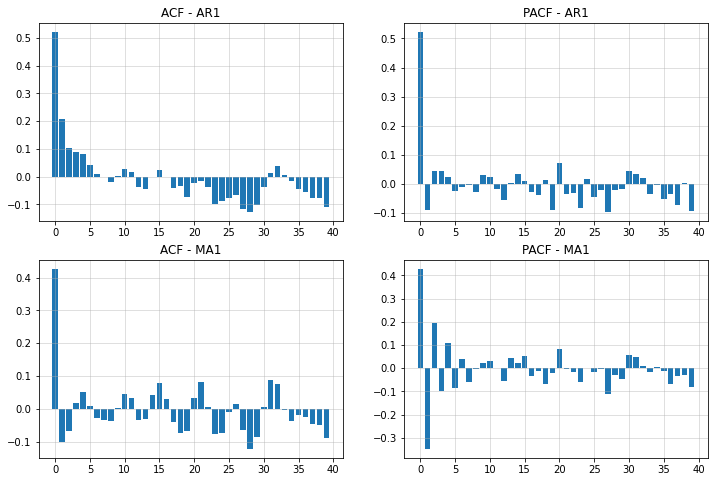

In [7]:
from statsmodels.tsa.stattools import acf, pacf

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

acf_ar1 = acf(ar1, nlags=40)
pacf_ar1 = pacf(ar1, nlags=40)
acf_ma1 = acf(ma1, nlags=40)
pacf_ma1 = pacf(ma1, nlags=40)


for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].grid(which='major', alpha=0.5)


ax[0, 0].bar(range(len(acf_ar1)-1), acf_ar1[1:])
ax[0, 0].set_title("ACF - AR1")
ax[0, 1].bar(range(len(acf_ar1)-1), pacf_ar1[1:])
ax[0, 1].set_title("PACF - AR1")
ax[1, 0].bar(range(len(acf_ar1)-1), acf_ma1[1:])
ax[1, 0].set_title("ACF - MA1")
ax[1, 1].bar(range(len(acf_ar1)-1), pacf_ma1[1:])
ax[1, 1].set_title("PACF - MA1")


## Question 3.12

Lastly, also using et as the white noise disturbance and assuming that the initial value of y is equal to zero, generate variable yarma which follows an ARMA(1,1) process:

$y_{t} = 0.5 + 0.55 y_{t-1} + \epsilon_t + 0.7 \epsilon_{t-1}$

In [8]:
arma11 = np.zeros(len(et))
for i in range(len(arma11) - 1):
    arma11[i+1] = 0.5 + 0.55 * arma11[i] + et[i+1] + 0.7 * et[i]

pd.Series(arma11)[4]

1.2061955946395875

## Question 3.13

Compute the ACF at lags 1-20 for the four series: et and Variables yar,yma and yarma and present the ACF at lag 1 for each of them.

In [9]:
vars = [et, ar1, ma1, arma11]
names = ['et', 'ar1', 'ma1', 'arma11']

for var, name in zip(vars, names):
    print(f'ACF {name} 1: {acf(var, nlags=20, fft=True)[1]}')


#acf(et, nlags=20, fft=False)[1]

ACF et 1: 0.023593845872415645
ACF ar1 1: 0.5212102638053465
ACF ma1 1: 0.42613799865435564
ACF arma11 1: 0.72656922353243


## Question 3.14

For the theoretical process underlying Variable AR1, what would be the ACF for lag 2 (to three decimal places, without any rounding)?

In [10]:
tar1 = np.zeros(len(et))
for i in range(len(tar1) - 1):
    tar1[i+1] = 3 + 0.55 * tar1[i]
    
pd.Series(tar1)
acf(tar1, nlags=5)

array([1.        , 0.54998613, 0.30247225, 0.16633338, 0.09145076,
       0.05025907])

## Question 3.15

Enter the values (using 3 decimal places, without any rounding) for the ACF at two lags for each series below:

In [11]:
vars = [et, ar1, ma1, arma11]
names = ['et', 'ar1', 'ma1', 'arma11']

for var, name in zip(vars, names):
    print(f'ACF {name} 2: {acf(var, nlags=20, fft=True)[2]}')

ACF et 2: -0.09905610126515028
ACF ar1 2: 0.2063701543512698
ACF ma1 2: -0.101539901006131
ACF arma11 2: 0.33086477779497714


## Question 3.16

Based on the definition of the partial autocorrelation (PAC) and the patterns of behavior shown in the previous video lecture, what should be the PAC at lags 1 and 2 for the theoretical process underlying Variable AR1?

$0.55$ and $0.00$, because theoretically should be no partial correlation between variables more $p=1$ lags away.

## Question 3.17

Estimate the PAC for variable yar for lag 1, then for lag 2.

In [12]:
dfar = (
    pd.DataFrame({'ar1': ar1})
    .assign(
        lag1 = lambda x: x.ar1.shift(1),
        lag2 = lambda x: x.ar1.shift(2)
    ).dropna()
)

smf.ols('ar1 ~ lag1', data=dfar).fit().params

Intercept    3.165231
lag1         0.521014
dtype: float64

## Question 3.18

Enter the PAC for two lags (to three decimal places, without any rounding):

In [13]:
smf.ols('ar1 ~ lag1 + lag2', data=dfar).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ar1   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     96.93
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.00e-36
Time:                        10:29:53   Log-Likelihood:                -694.97
No. Observations:                 498   AIC:                             1396.
Df Residuals:                     495   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4238      0.283     12.093      0.000       2.867       3.980
lag1           0.5699      0.045     12.709      0.000       0.482       0.658
lag2          -0.0883      0.044     -2.028      0.043      -0.174      -0.003
==============================================================================
Omnibus:                        0.891   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.697
Skew:                           0.025   Prob(JB):                        0.706
Kurtosis:                       3.176   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 3.20

In [14]:
df_pe_ind = pd.read_csv("data/module3_data_PE_Ratios.csv", index_col='dateid01', parse_dates=True)
pe_ind = df_pe_ind.loc[:, ['pe_ind']].dropna()
pe_ind.index.freq = 'MS'
pe_ind

,pe_ind
dateid01,
2000-01-01,16.4949
2000-02-01,17.2608
2000-03-01,14.4154
2000-04-01,13.4247
2000-05-01,12.7792
...,...
2014-10-01,19.3798
2014-11-01,19.9561
2014-12-01,19.4043


Always plot the data!

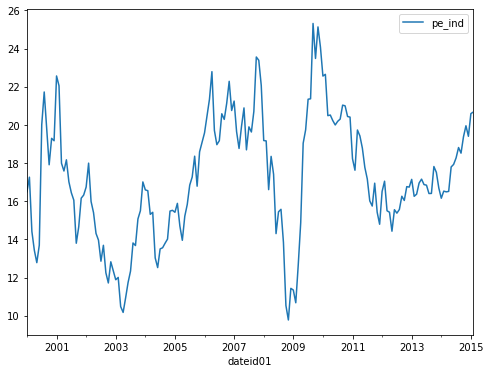

In [15]:
pe_ind.plot(figsize=(8, 6));

Visually, the mean appears to be more or less constant, but there is clear autocorrelation (memory) in the series.

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(pe_ind['pe_ind'], trend='c', order=(1, 0, 0)).fit(disp=0)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 pe_ind   No. Observations:                  182
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -311.138
Date:                Tue, 19 Oct 2021   AIC                            628.276
Time:                        10:29:56   BIC                            637.888
Sample:                    01-01-2000   HQIC                           632.173
                         - 02-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5940      0.532      2.994      0.003       0.551       2.637
ar.L1          0.9080      0.030     30.674      0.000       0.850       0.966
sigma2         1.7712      0.129     13.749      0.000       1.519       2.024
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                56.89
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note that the intercept estimated by `SARIMAX` differs from the intercept displayed by EViews. That's because EViews displays the long-run mean, while `SARIMAX` display the short-run intercept.

To recover the long-run mean, we need to divide the short-run coefficient by $1 - AR(1)$

In [17]:
print(f'LR = {model1.params[0] / (1 - model1.params[1])}')

LR = 17.319795078279242


In `statsmodels`, to use only specific lags, they must be passed inside a list.

In [18]:
model2 = SARIMAX(pe_ind['pe_ind'], trend='c', order=([1, 8], 0, 0)).fit(disp=0)
model3 = SARIMAX(pe_ind['pe_ind'], trend='c', order=([1, 8], 0, [8])).fit(disp=0, maxiter=1000);

Note that `statsmodels` does not calculate the information criteria in the same way as EViews which is also not equal to the formulae presented in the lectures. However, note that the ordering remains the same regardless of the method used.

To be consistent, pick one way of calculating the information criteria and stick with them.

For reference:

- `statsmodels`: https://www.statsmodels.org/stable/_modules/statsmodels/tools/eval_measures.html#aic

- EViews: http://www.eviews.com/help/helpintro.html#page/content/infoapp-Definitions.html

For reproducibility and comparison-sake, I'm going to define some helper functions to retrieve the EViews values and also the values using the formulae in the videos.

In [19]:
# Defined in `utils_statsmodels` as well.
# def aic_eviews(model):
#     df = model.df_model
#     llf = model.llf
#     n = model.nobs
#     return -2 * (llf/n) + 2 * (df/n)

# def bic_eviews(model):
#     df = model.df_model
#     llf = model.llf
#     n = model.nobs
#     return -2 * (llf/n) + df * np.log(n) / (n)

# def aic_lectures(model):
#     df = model.df_model
#     sse = model.sse
#     n = model.nobs
#     return n * np.log(sse) + 2 * df

# def bic_lectures(model):
#     df = model.df_model
#     sse = model.sse
#     n = model.nobs
#     return n * np.log(sse) + df * np.log(n)

from utils_statsmodels import aic_eviews, bic_eviews, aic_lectures, bic_lectures

sse = []
aic1 = []
bic1 = []
aic2 = []
bic2 = []
aic3 = []
bic3 = []

for model in [model1, model2, model3]:
    sse.append(model.sse)
    aic1.append(aic_eviews(model))
    bic1.append(bic_eviews(model))
    aic2.append(aic_lectures(model))
    bic2.append(bic_lectures(model))
    aic3.append(model.aic)
    bic3.append(model.bic)

pd.DataFrame({"SSE": sse, "AIC-EViews": aic1, "BIC-Eviews": bic1,
              'AIC-Lecture': aic2, 'BIC-Lecture': bic2,
              'AIC-statsmodels': aic3, 'BIC-statsmodels': bic3}, index=['M1', "M2", 'M3'])

,SSE,AIC-EViews,BIC-Eviews,AIC-Lecture,BIC-Lecture,AIC-statsmodels,BIC-statsmodels
M1,322.921688,3.452067,3.504880,1057.488591,1067.100611,628.276151,637.888171
M2,314.265643,3.434846,3.505264,1054.543430,1067.359457,625.142008,637.958035
M3,301.642289,3.398326,3.486348,1049.082015,1065.102048,618.495289,634.515323


M3 has the smallest SSR.

## Question 3.21

M3 has the smallest AIC

## Question 3.22

M3 has also the smallest BIC

## Question 3.23

First, we plot the ACF and PACF.

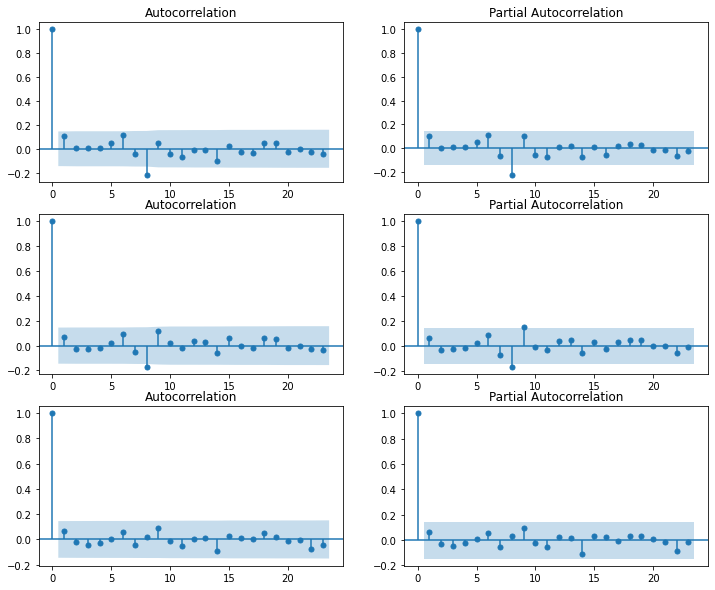

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(12, 10))

plot_acf(model1.resid, ax=ax[0, 0])
plot_pacf(model1.resid, ax=ax[0, 1])

plot_acf(model2.resid, ax=ax[1, 0])
plot_pacf(model2.resid, ax=ax[1, 1])

plot_acf(model3.resid, ax=ax[2, 0])
plot_pacf(model3.resid, ax=ax[2, 1]);

However, to asnwer the question, we must run a test to check for autocorrelation in the residuals. Here I'm calling the `acorr_ljunbox()` function from `statsmodels` and using the Ljung-Box test for it. 

There's a Box-Pierce option, but the values rendered are not exactly the same as in EViews. Feel free to explore the `acorr_ljungbox()` function.

In [21]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lbpvals = {}

for i, (arma_term, model) in enumerate(zip([1, 2, 3], [model1, model2, model3]), 1):
    lbpvals[f'M{i}'] = acorr_ljungbox(model.resid, lags=10, boxpierce=True, model_df=arma_term, return_df=True)['lb_pvalue'].values

pd.DataFrame(lbpvals)

,M1,M2,M3
0,NaN,NaN,NaN
1,0.157698,NaN,NaN
2,0.367022,0.302056,NaN
3,0.567144,0.573568,0.230848
4,0.651490,0.750096,0.486762
5,0.436959,0.587377,0.567309
6,0.521825,0.637058,0.655621
7,0.045379,0.177577,0.774699
8,0.062991,0.116793,0.653047
9,0.087368,0.169759,0.756522


There's no evidence of autocorrelation in the residuals in M2 and M3.

## Simulate random variables with Python

Before moving to the questions of Session 5, I want to show how to simulate ARIMA processes using Python.

It is actually super easy, requiring the utilization of the `np.random.normal()` function from `numpy`.

To mimic the example from the lecture, let's simulate a

$y_t = 0.65*y_{t-1} + \epsilon_{t}$

process, where, $\epsilon$ is a white noise disturbance.

In [22]:
ar1 = np.zeros(1382)
epsilon = np.random.normal(0, 1, len(ar1))

for i in range(1, len(ar1)):
    ar1[i] = 0.65 * ar1[i-1] + epsilon[i]


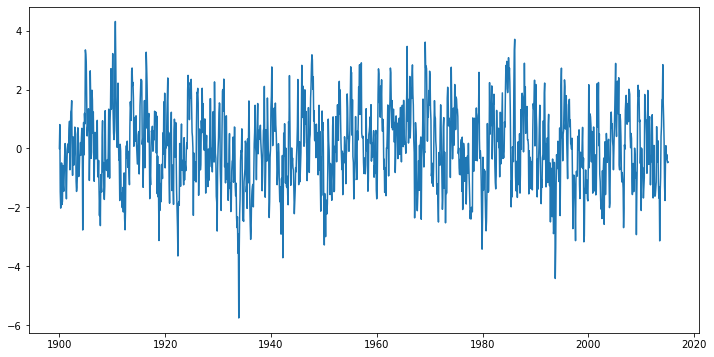

In [23]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pd.date_range(start='1900-01-01', periods=1382, freq='MS'), ar1);

Fit the model and check that the variable is significant.

In [24]:
ar1fit = SARIMAX(ar1, order=(1, 0, 0)).fit(disp=0).summary()
ar1fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1965.098
Date:                Tue, 19 Oct 2021   AIC                           3934.195
Time:                        10:30:11   BIC                           3944.658
Sample:                             0   HQIC                          3938.109
                               - 1382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6636      0.021     32.261      0.000       0.623       0.704
sigma2         1.0056      0.038     26.376      0.000       0.931       1.080
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.61   Prob(JB):                         0.74
Heteroskedasticity (H):               1.03   Skew:                            -0.05
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

I'll leave as an exercise for the reader of this notebook to test different models, plot the residuals, ACF and PACF, and do the tests on the residuals.

Before moving to the questions of session 5, I want to show how to find automatically the "best" lags by using the `auto_arima()` function from `pmdarima`.

In [25]:
from pmdarima.arima import auto_arima

# help(auto_arima) # Uncomment to read about this function

In [26]:
# I leave trace=True to check the models tested by the function. 
# We see that it doesn't check all the possible combinations;
# instead, if the metric (AIC) stops decreasing after the inclusion of lags it stops looking.

auto_arima(ar1, start_p=0, start_q=0, max_p=6, max_q=6, stationary=True, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4737.026, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3936.133, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4178.325, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4735.354, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3937.500, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3937.418, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3937.196, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3934.195, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3935.559, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3935.477, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4176.524, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3935.240, Time=0.33 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.757 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1965.098
Date:                Tue, 19 Oct 2021   AIC                           3934.195
Time:                        10:30:19   BIC                           3944.658
Sample:                             0   HQIC                          3938.109
                               - 1382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6636      0.021     32.261      0.000       0.623       0.704
sigma2         1.0056      0.038     26.376      0.000       0.931       1.080
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.61   Prob(JB):                         0.74
Heteroskedasticity (H):               1.03   Skew:                            -0.05
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
sim_arma = pd.read_csv("data/module3_data_Simulated_ARMA.csv", index_col='dateid01', parse_dates=True)
sim_arma.index.freq = 'MS'
sim_arma = sim_arma.drop(columns='dateid')
sim_arma.head()

,y,z
dateid01,,
1900-01-01,0.000000,0.000000
1900-02-01,0.000000,-0.698508
1900-03-01,-0.142965,0.290892
1900-04-01,0.627469,0.418416
1900-05-01,0.407678,2.434994


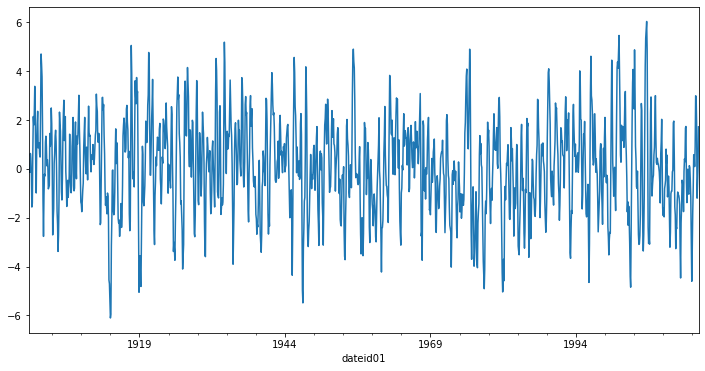

In [28]:
sim_arma['y'].plot(figsize=(12, 6));

## Question 3.26
## Question 3.27

Estimate two models: AR(1) and AR(2) using the `y` series, and calculate the BIC and the Q-statistic for lag12 on the residuals.

In [29]:
mar1 = SARIMAX(sim_arma['y'], order=(1, 0, 0), trend='c').fit(disp=0)
mar2 = SARIMAX(sim_arma['y'], order=(2, 0, 0), trend='c').fit(disp=0)


print(f'AR(1) BIC: {bic_eviews(mar1)}')
print(f'AR(2) BIC: {bic_eviews(mar2)}')

AR(1) BIC: 3.1028476542711507
AR(2) BIC: 2.8274920920442157


In [30]:
auto_arima(sim_arma['y'], stationary=True, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3889.039, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5736.057, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4272.442, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4564.042, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5735.695, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3912.377, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3887.932, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3971.577, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3886.669, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3887.859, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3890.345, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3885.227, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4270.643, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3886.391, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1939.613
Date:                Tue, 19 Oct 2021   AIC                           3885.227
Time:                        10:30:25   BIC                           3900.921
Sample:                             0   HQIC                          3891.097
                               - 1382                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2089      0.023     52.491      0.000       1.164       1.254
ar.L2         -0.4944      0.023    -21.602      0.000      -0.539      -0.450
sigma2         0.9684      0.038     25.189      0.000       0.893       1.044
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.64   Prob(JB):                         0.48
Heteroskedasticity (H):               0.97   Skew:                             0.04
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For some reason, EViews likes the ARMA(6, 5) model. I tried this model here in Python, and also with R's `forecast::Arima()` function, and both software report AIC and BIC values that are inferior to the ARMA(2, 0) model that we know is true.

For answering the questions then you'll have to use guesswork.

## Question 3.32

Let's go back to the `pe_ind` series.

After viewing the ACF and PACF, which of the following statistical processes appears to be more likely?

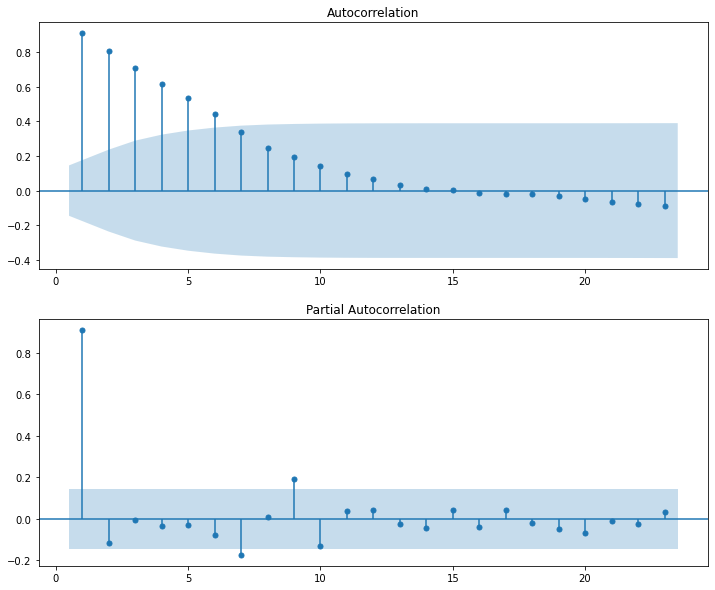

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

plot_acf(pe_ind['pe_ind'], ax=ax[0], lags=np.arange(1, 24))
plot_pacf(pe_ind['pe_ind'], ax=ax[1], lags=np.arange(1, 24));

It looks like an AR(2) process, perhaps an AR(7) if you wish.

## Question 3.33

Use `auto_arima()` to select a model. (Note: the results might differ from EViews)

In [94]:
auto_arima(pe_ind['pe_ind'], start_p=0, start_q=0, stationary=True, trace=False, information_criterion='aic').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -310.020
Date:                Tue, 19 Oct 2021   AIC                            628.040
Time:                        14:05:21   BIC                            640.856
Sample:                             0   HQIC                           633.236
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7604      0.530      3.321      0.001       0.722       2.799
ar.L1          1.0085      0.084     11.973      0.000       0.843       1.174
ar.L2         -0.1103      0.081     -1.359      0.174      -0.269       0.049
sigma2         1.7493      0.135     13.004      0.000       1.486       2.013
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                49.32
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Question 3.34

Using "BIC"

In [95]:
auto_arima(pe_ind['pe_ind'], stationary=True, trace=False, information_criterion='bic').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -311.138
Date:                Tue, 19 Oct 2021   AIC                            628.276
Time:                        14:05:25   BIC                            637.888
Sample:                             0   HQIC                           632.173
                                - 182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5940      0.532      2.994      0.003       0.551       2.637
ar.L1          0.9080      0.030     30.674      0.000       0.850       0.966
sigma2         1.7712      0.129     13.749      0.000       1.519       2.024
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                56.89
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
arma11 = SARIMAX(pe_ind['pe_ind'], order=(1, 0, 1), trend='c').fit(disp=0)
ar2 = SARIMAX(pe_ind['pe_ind'], order=(2, 0, 0), trend='c').fit(disp=0)
ar1 = SARIMAX(pe_ind['pe_ind'], order=(1, 0, 0), trend='c').fit(disp=0)
arma56 = SARIMAX(pe_ind['pe_ind'], order=(5, 0, 6), trend='c', maxiter=10000, method='nm').fit(disp=0)
arma18 = SARIMAX(pe_ind['pe_ind'], order=([1, 8], 0, [8]), trend='c').fit(disp=0)

/home/joao/moocs/time-series/envs/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
bic_evs = []
aic_evs = []
bic_stats = []
aic_stats = []

models = [ar1, ar2, arma11, arma56, arma18]
aliases = ['AR(1)', 'AR(2)', 'ARMA(1, 1)', 'ARMA(5, 6)', 'ARMA([1, 8], [8])']

for model in models:
    bic_evs.append(bic_eviews(model))
    aic_evs.append(aic_eviews(model))
    bic_stats.append(model.bic)
    aic_stats.append(model.aic)

pd.DataFrame({
    'AIC_EV': aic_evs,
    'BIC_EV': bic_evs,
    'AIC_stats': aic_stats,
    'BIC_stats': bic_stats
}, index=aliases)

,AIC_EV,BIC_EV,AIC_stats,BIC_stats
AR(1),3.452067,3.504880,628.276151,637.888171
AR(2),3.450771,3.521189,628.040293,640.856320
"ARMA(1, 1)",3.451091,3.521508,628.098513,640.914539
"ARMA(5, 6)",3.466340,3.695197,630.873829,672.525916
"ARMA([1, 8], [8])",3.398326,3.486348,618.495289,634.515323
